# Algorithm : Continuous Piecewise Linear Fitting

<h5>Description:</h5>
<ul>
<li>This algorithm fits continuous piecewise linear functions to 1D data.</li>
<li>It supports two scenarios: known breakpoints and unknown breakpoints.</li>
<li>For known breakpoints, it performs a simple least squares fit based on the given breakpoints.</li>
<li>For unknown breakpoints, it uses optimization to find the optimal breakpoint locations and model parameters iteratively.</li>
</ul>

<h3>Importing the necessary libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pwlf import PiecewiseLinFit

<h3>Define Function to Read Data</h3>

In [4]:
def read_data_from_txt(file_path):
    """
    Read time series data from a file.

    Parameters:
    - file_path (str): Path to the file containing time series data.

    Returns:
    - xs (numpy.ndarray): Array of x-coordinates for the time series data.
    - ys (numpy.ndarray): Array of y-coordinates for the time series data.
    """
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data = [float(line.strip()) for line in lines if line.strip()]
        xs = np.arange(len(data))
        ys = np.array(data)
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

def read_data_from_csv(file_path,target_name):
    """
    Read time series data from a file.

    Parameters:
    - file_path (str): Path to the file containing time series data.

    Returns:
    - xs (numpy.ndarray): Array of x-coordinates for the time series data.
    - ys (numpy.ndarray): Array of y-coordinates for the time series data.
    """
    try:
        df=pd.read_csv(file_path)
        xs = np.arange(len(df))
        ys = df[target_name].values
        return xs, ys
    except FileNotFoundError:
        print("File not found.")
        return None, None
    except Exception as e:
        print("Error reading data:", e)
        return None, None

<h3>Define Function to Determine Breakpoints for Piecewise Linear Fit</h3>

In [5]:
def get_breakpoints(x,y,num_segments):
    # Initialize piecewise linear fit object
    my_pwlf = PiecewiseLinFit(x, y)

    # Fit the data with the specified number of line segments
    breakpoints = my_pwlf.fit(num_segments)
    yp = my_pwlf.predict(x)
    return breakpoints,yp

<h3>Define Function to Plot Piecewise Linear Fit with Segments and Breakpoints</h3>

In [6]:
def plot_segments(x,y,yp,breakpoints):
    # Predict values using the piecewise linear fit

    # Plot the original data and the piecewise linear fit
    plt.figure(figsize=(12, 9))
    plt.plot(x, y, 'bo', label='Original Data')
    plt.plot(x, yp, 'g-', label='Piecewise Linear Fit')

    # Plot segment breakpoints
    for breakpoint in breakpoints:
        plt.axvline(x=breakpoint, color='r', linestyle='--', linewidth=1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Piecewise Linear Regression with Segments')
    plt.legend()
    plt.grid(True)
    plt.show()

<h3>Testing Algorithm on Chinatown Data</h3>

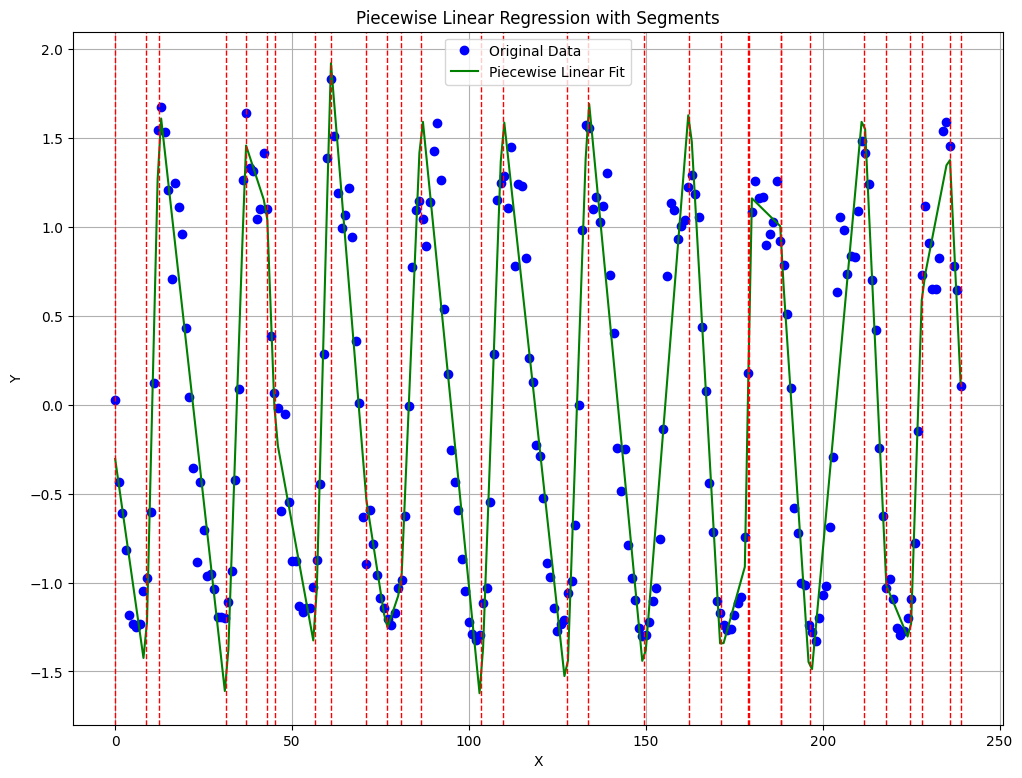

In [ ]:
x,y=read_data_from_txt("../datasets/UCR Time Series/Chinatown.txt")
breakpoints,yp=get_breakpoints(x,y,30)
plot_segments(x,y,yp,breakpoints)

# <h3>Testing Algorithm on TwoLeadECG Data</h3>

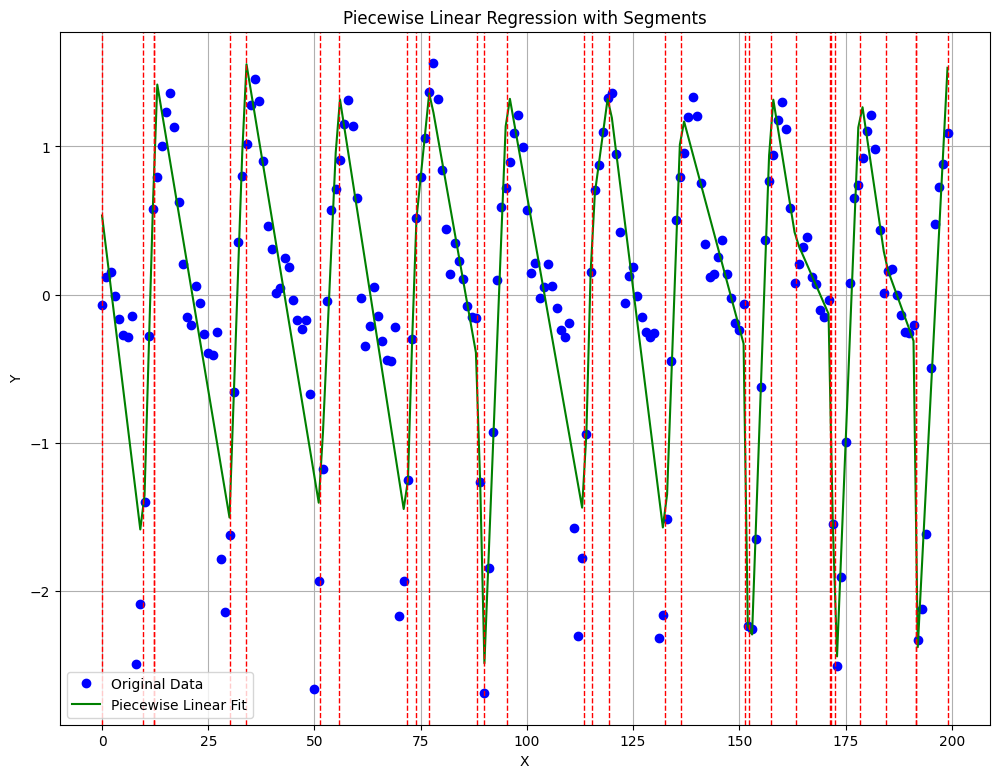

In [ ]:
x,y=read_data_from_txt('../datasets/UCR Time Series/TwoLeadECG.txt')
x,y=x[:200],y[:200]
breakpoints,yp=get_breakpoints(x,y,20)
plot_segments(x,y,yp,breakpoints)

# <h3>Testing Algorithm on Weather Data</h3>

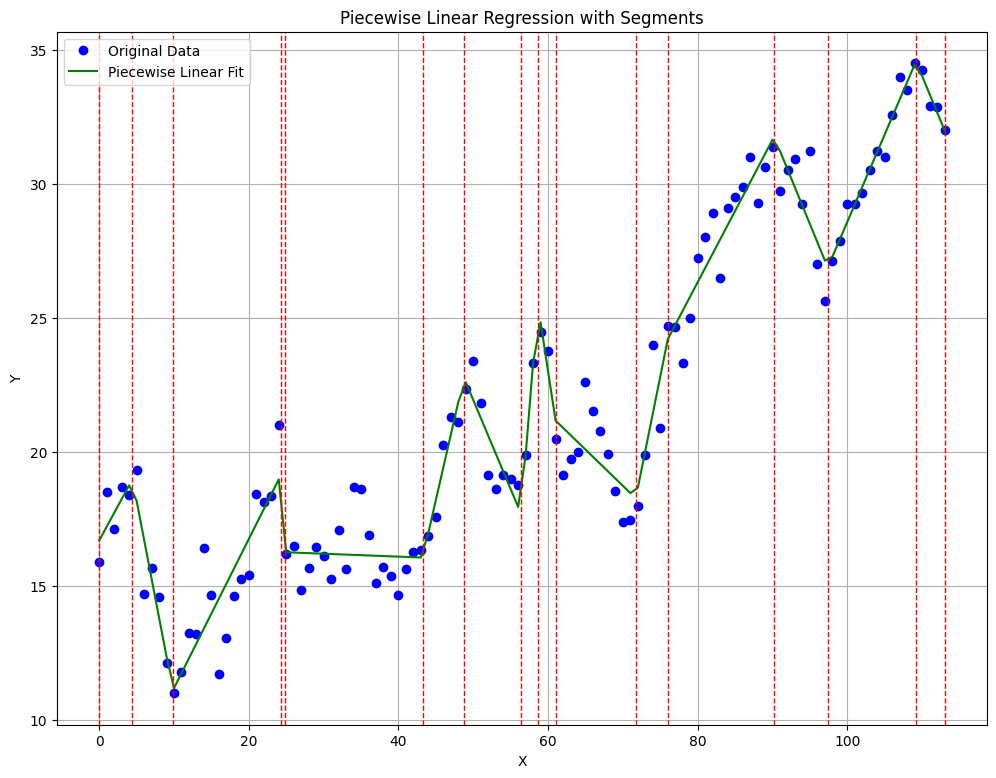

In [9]:
x,y=read_data_from_csv("../datasets/weather dataset/DailyDelhiClimateTest.csv",target_name="meantemp")
breakpoints,yp=get_breakpoints(x,y,15)
plot_segments(x,y,yp,breakpoints)

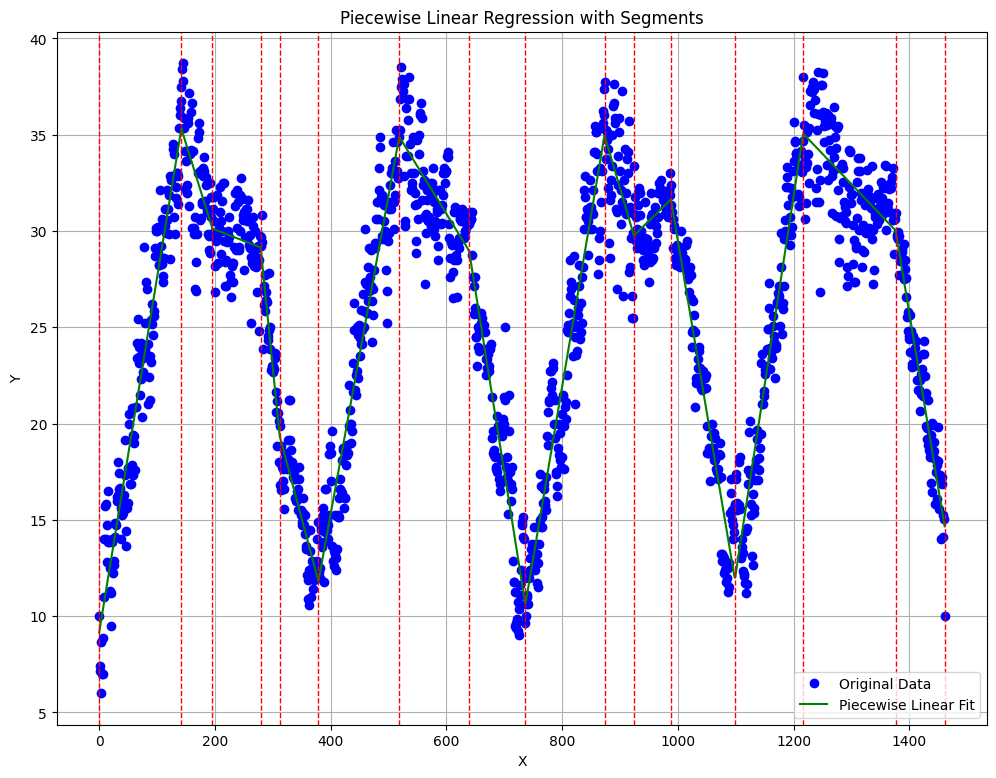

In [20]:
x,y=read_data_from_csv("../datasets/weather dataset/DailyDelhiClimateTrain.csv",target_name="meantemp")
breakpoints,yp=get_breakpoints(x,y,15)
plot_segments(x,y,yp,breakpoints)